<a href="https://colab.research.google.com/github/NetoRibeiro/ML_ImageClassification_Supervised_Learning/blob/main/COMP8043_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Juvencio Ribeiro Franco Neto
## R00206995
### COMP8043 | Assignment 2 | Machile Learning Model

## Import Libraries

In [1]:
# Skelearn
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm, metrics, neighbors, tree, random
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import Perceptron

# Helper libraries
import pandas as pd
import numpy as np
import datetime as dt
from time import time
import matplotlib.pyplot as plt

## EDA

### Task 1 (pre-processing and visualisation)

In [2]:
# Import file from Google Drive
# File Path
file_name_images = '/content/drive/MyDrive/COMP8043_Machine_Learning/Assignment2/product_images.csv'

In [3]:
# Load the product images [1 point]
df_images = pd.read_csv(file_name_images)
# Displaying 3 random Rows of the data set
df_images.sample(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
13055,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Create a list of Labels to use as name os the Label
class_names = ['Sneaker', 'Ankle boot']

In [5]:
# Group the Labels and Count
df_count_labels = df_images.groupby(by=['label'], as_index=False)['label'].count()

In [6]:
# How many samples are images of sneakers [1 point]?
# How many samples are images of ankle boots [1 point]?
# For loop to print the 2 labels
for i in range(0,2):
  print(f' There are: {df_count_labels.iloc[i][0]} {class_names[i]}')

 There are: 7000 Sneaker
 There are: 7000 Ankle boot


In [7]:
# Parameterise the number of samples to use from the dataset in order to be able to control the runtime of the algorithm evaluation [1 point]. 
def sample_control(sample_number):
  # Check the Max of samples available
  max_sample = df_images.shape[0]
  if sample_number > max_sample:
    # Controling to the sample number never be greater than the Dataset size
    sample_number = max_sample
  # Create recursive loop to make sure at least one Sneaker and one Uncle Boots are in the sample file
  # Display at least one image for each class [2 points].
  minium_labels = False
  while minium_labels is not True:
    df = df_images.sample(sample_number).copy()
    minium_labels = len(set(df['label'])) >= 2
  # Separate the labels [1 point] 
  # from the feature vectors [1 point]
  # Separate the labels from the feature vectors
  # Keep only Labels
  images_label = np.array(df['label'].copy())
  # Drop column Labels keeping only features
  images_pixels = np.array(df.drop(columns=['label']))
  print(images_label.shape, images_pixels.shape)
  return images_pixels, images_label

In [8]:
# Call Sample of 5 to print five images
# Start developing using a small number of samples, and increase for the final evaluation.
images_pixels, images_label = sample_control(5)

(5,) (5, 784)


Interpolation is off of the request, however, it is a good information to know.
<p>Interpolation Examples: <p>https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html

In [9]:
# Create an Interpolation List
interpolation_list = [
                      'None', 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
                      'spline36', 'hanning', 'hermite', 'kaiser', 'quadric',
                      'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
                      ]

Plot First Image showing the diference between the Interpolation option list

Plot the image for one Sneaker to find the best Interpolation


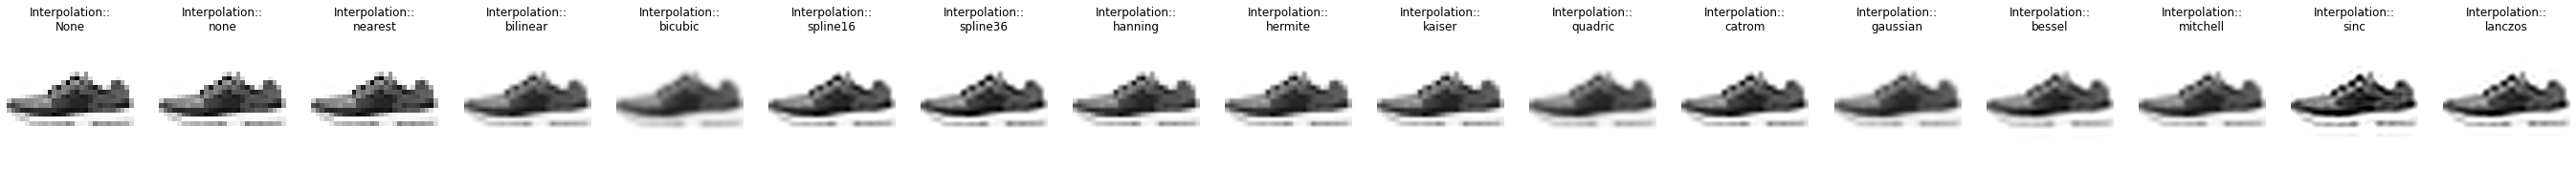

In [10]:
# Creating subplot to run throught for loop
fig, axes = plt.subplots(
    # Number of rows
    nrows=1,
    # Number of columns based on the Interpolation List size
    ncols=len(interpolation_list),
    # Plot size
    figsize=(48, 24)
    )
# Create imame position List
i = 0
# For loop to run over the images dataset, subplots and image position
print(f'Plot the image for one {class_names[i]} to find the best Interpolation')
for ax, interpolation_i in zip(axes, interpolation_list):
  # reset axis
  ax.set_axis_off()
  ax.imshow(
      # Base on the Position (i) print the Image doing a Reshape to 28 X 28
      np.reshape(
      images_pixels[i], newshape=(-1, 28, 28 )
      # Taking only the First position of the Reshape out comes
      )[0],
      # Set the Plot to Gray
      cmap=plt.cm.gray_r,
      # Set the select interpolation
      interpolation=interpolation_i
      )
  ax.set_title(f'Interpolation::\n{interpolation_i}')

Selecting the best interpolation to interprete the Image

In [11]:
# Best Interpolation for me was BESSEL
best_inter = str(interpolation_list[13])

Displaying 5 Images as requested

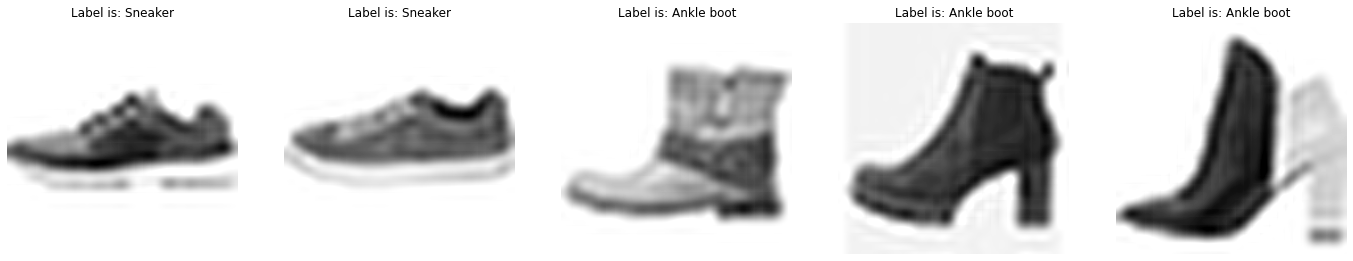

In [12]:
# Display at least one image for each class [2 points].
# Plot the first 5 images
# Creating subplot to run throught the for loop
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24, 8))
# Create imame position List
i = [0, 1, 2, 3, 4]
# For loop to run over the images dataset, subplots and image position
for ax, image_in, i in zip(axes, images_pixels, i):
  # reset axis
  ax.set_axis_off()
  ax.imshow(
      # Base on the Position (i) print the Image doing a Reshape to 28 X 28
      np.reshape(
      image_in, newshape=(-1, 28, 28 )
      # Taking only the First position of the Reshape out comes
      )[0],
      # Set the Plot to Gray
      cmap=plt.cm.gray_r,
      # Set the select interpolation
      interpolation=best_inter
      )
  ax.set_title(f'Label is: {class_names[images_label[i]]}')

Starting with Models Requested

## Model Preceptron

Create a funtion that runs all requested models.

In [13]:
# Create a Function to run the Models
def run_requested_model(sample_size, kfold_max, model):
  
  # Call Sample Control to start
  images_pixels, images_label = sample_control(sample_size)
  
  # Initialize the Variable to store Best Model Score
  best_model_score = 0.0

  # Store the Requested Model
  model_name = f'Requested Model:: {model}'
  
  # Initialize the Percptron Model
  model = model
  
  # Set the kfold based on the kfold_max variable requested by the user
  cv_kfold = KFold(n_splits=kfold_max, random_state=1, shuffle=True)

  # Create a Dictionary to store the Model Train time spent and Score
  dict_train_time = dict()
  dict_prediction_time = dict()
  dict_accuracy_time = dict()
  dict_accuracy_score = dict()

  # Set i to controlling the kfold position
  i = 1
  
  # Split the Data and run the model based on the kfold
  for train, test in cv_kfold.split(images_pixels):
    
    # Store the start time for split the data
    start = time()
    
    # Split the Data into Train and Test
    X_train, X_test, y_train, y_test = images_pixels[train], images_pixels[test], images_label[train], images_label[test]
    
    # fit the Model using the train and test data from the Kfold
    model = model.fit(X_train, y_train)

    # Print the answer the time spent questions
    print("x"*30, model_name, f' Fold at {i}', "x"*30)
    print(f'Train took\t{time() - start:.4f} seconds')
    # Append to the Dictionary the time spent
    dict_train_time[i] = (time() - start)

    # Store the start time for Predict
    start = time()
    # Create a variable to Store the Model Predict
    y_predicted = model.predict(X_test)
    # Append to the Dictionary the time spent for Predict
    dict_prediction_time[i] = (time() - start)
    # Print the answer the time spent questions
    print(f'Prediction took\t{time() - start:.4f} seconds')
    # Print the answer the confusion matrix questions
    print("x"*40, "Confusion Matrix", "x"*40)
    print(confusion_matrix(y_true=y_test, y_pred=y_predicted))
    print("x"*100)

    # Store the start time for Predict
    start = time()
    # Create a variable to Store the Model Score
    model_score = model.score(X_test, y_test)
    # Append to the Dictionary the Score for diction accuracy
    dict_accuracy_score[i] = model_score
    # Append to the Dictionary the time spent for diction accuracy
    dict_accuracy_time[i] = (time() - start)
    # Print the answer the Accurary Score questions
    print(f'Accuracy took\t{time() - start:.4f} seconds')
    print(f'Predictor Accurary\t{model_score:.2%}')
    print("x"*100)
    # Controling the Best Score
    # If the active model is greater than the stored as the best
    # replace the best score to the active one
    if best_model_score < model_score:
      # Store the best score
      best_model_score = model_score
      # Store the best time spent
      best_time_spent = time() - start
      # Store the best kfold
      best_i = i
      # Store the Best Train and Test index
      best_train, best_test = train, test

    # Controlling the kfold number  
    i += 1
  
  # By the end of the kfold print al of the Best numbers
  print("x"*100)
  print(f'Best Predictor took::\t{best_time_spent:.4f} seconds')
  print(f'Best Predictor Accurary::\t{best_model_score:.2%}')
  print(f'Best Predictor K-Fold split was::\t{best_i}')
  print("x"*100)

  # Return the dictionaries and the best train and test index from the best model and a list of Images and Images Label
  return dict_accuracy_score, dict_train_time, dict_prediction_time, dict_accuracy_time, best_model_score, best_time_spent, best_i, best_train, best_test, images_pixels, images_label

Call the First Model Perceptron:<p>Sample size as: 5k<p>Kfold as: 10

In [14]:
# To the Task 2 we need to call Perceptron
# I choose sample size of 5k and kfold 10
model_requested = Perceptron()
sample_size_requested = 5000
kfold_max_requested = 10
# Call the function and store the returns into the correct variables to be used in the future
perceptron_dict_accuracy_score_perc, perceptron_dict_train_time_perc, perceptron_dict_prediction_time_perc, perceptron_dict_accuracy_time_perc, best_model_score_perc, best_time_spent_perc, best_kfold_perc, best_train_perc, best_test_perc, images_pixels_perc, images_label_perc = run_requested_model(
    sample_size=sample_size_requested,
    kfold_max=kfold_max_requested,
    model=model_requested)

(5000,) (5000, 784)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx Requested Model:: Perceptron()  Fold at 1 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Train took	0.2195 seconds
Prediction took	0.0020 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx Confusion Matrix xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
[[234  11]
 [  7 248]]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy took	0.0022 seconds
Predictor Accurary	96.40%
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx Requested Model:: Perceptron()  Fold at 2 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Train took	0.2431 seconds
Prediction took	0.0024 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx Confusion Matrix xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
[[238  14]
 [  7 241]]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy took	0.0019 seconds
Predictor Accurary	95.80%
x

Create a function that measures the outcome dictionaries and print it

In [15]:
def calculate_time_spent(dict_train_time, dict_prediction_time, dict_accuracy_time, dict_accuracy_score):
    
  # Create a list of the Disctionaries and list of the Measures
  list_of_dicts = dict_train_time, dict_prediction_time, dict_accuracy_time
  list_of_dicts_name = ["Train", "Prediction", "Accurary"]
  print("x"*100)
  # Print the Minimum, Maximum and Average
  # Calculate the minimum, the maximum, and the average of the training/prediction/prediction accuracy time for each sample
  # Initialize a list to return vectors of the time spent
  list_of_df_time_spent = []
  # Measure time spent
  for dicts_i, names_i in zip(list_of_dicts, list_of_dicts_name):
    df_time_measure = pd.DataFrame.from_dict(dicts_i, orient='index')
    df_time_measure.rename(columns={0: f'time_spent_{names_i}'}, inplace=True)
    time_measure_min = np.min(df_time_measure[f'time_spent_{names_i}'])
    time_measure_max = np.max(df_time_measure[f'time_spent_{names_i}'])
    time_measure_avg = np.mean(df_time_measure[f'time_spent_{names_i}'])
    # Transform the Dataframe to an numpy array
    list_of_df_time_spent.append(np.array(df_time_measure))
    print(f'The minimum time for {names_i} was {time_measure_min:.4f} seconds')
    print(f'The maximum time for {names_i} was {time_measure_max:.4f} seconds')
    print(f'The average time for {names_i} was {time_measure_avg:.4f} seconds')
    print("x"*100)
  
  # Measure Accurary
  df_acc_measure = pd.DataFrame.from_dict(dict_accuracy_score, orient='index')
  df_acc_measure.rename(columns={0: 'Accurary'}, inplace=True)
  acc_measure_min = np.min(df_acc_measure["Accurary"])
  acc_measure_max = np.max(df_acc_measure["Accurary"])
  acc_measure_avg = np.mean(df_acc_measure["Accurary"])
  # Transform the Dataframe to an numpy array
  list_of_df_time_spent.append(np.array(df_acc_measure))
  print(f'The minimum Score was {acc_measure_min:.2%}')
  print(f'The maximum Score was {acc_measure_max:.2%}')
  print(f'The average Score was {acc_measure_avg:.2%}')
  print("x"*100)
  
  # Return all 3 requested data frames as numpy array
  return list_of_df_time_spent

Call print/measure function passing the dictionaries from the Perceptron runs

In [16]:
# Task 2 Get the Time Measures
list_of_df_timed = calculate_time_spent(
    perceptron_dict_train_time_perc, perceptron_dict_prediction_time_perc, perceptron_dict_accuracy_time_perc, perceptron_dict_accuracy_score_perc
    )

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The minimum time for Train was 0.1420 seconds
The maximum time for Train was 0.3306 seconds
The average time for Train was 0.2348 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The minimum time for Prediction was 0.0014 seconds
The maximum time for Prediction was 0.0049 seconds
The average time for Prediction was 0.0024 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The minimum time for Accurary was 0.0018 seconds
The maximum time for Accurary was 0.0028 seconds
The average time for Accurary was 0.0020 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The minimum Score was 89.80%
The maximum Score was 96.40%
The average Score was 94.04%
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Transform the Dictionaries into a Data Frame

In [17]:
# Create a Dataframe with the time measures for the Perceptron
df_timed_perc = pd.DataFrame()
# df_timed_perc = pd.DataFrame(np.array(list_of_df_timed).reshape(-1, 4))
for i in range(0,len(list_of_df_timed)):
  df_timed_perc[f'Shape_{i}'] = np.array(list_of_df_timed[i]).reshape(-1)

df_timed_perc.rename(columns={"Shape_0": "Train_Time", "Shape_1": "Prediction_Time", "Shape_2": "Accurary_Time", "Shape_3": "Accuray_Score"}, inplace=True)
df_timed_perc['Best_KFold'] = best_kfold_perc
df_timed_perc['Model_Name'] = "Perceptron"
df_timed_perc

,Train_Time,Prediction_Time,Accurary_Time,Accuray_Score,Best_KFold,Model_Name
0,0.219556,0.002016,0.002153,0.964,1,Perceptron
1,0.243327,0.002411,0.001912,0.958,1,Perceptron
2,0.142000,0.001479,0.001843,0.898,1,Perceptron
3,0.226227,0.001708,0.001968,0.954,1,Perceptron
4,0.240752,0.003002,0.002208,0.934,1,Perceptron
5,0.330590,0.004171,0.001838,0.942,1,Perceptron
6,0.321549,0.001408,0.002033,0.934,1,Perceptron
7,0.163844,0.001754,0.002841,0.948,1,Perceptron
8,0.233203,0.001410,0.001866,0.934,1,Perceptron
9,0.226810,0.004929,0.001835,0.938,1,Perceptron


## Print the best Mesures Accurary, Confusion Matric, Precision, Recall and f1-score

In [18]:
# Create the Best Train and Test data
best_X_train, best_X_test, best_y_train, best_y_test = images_pixels_perc[best_train_perc], images_pixels_perc[best_test_perc], images_label_perc[best_train_perc], images_label_perc[best_test_perc]

In [19]:
model_requested = model_requested.fit(best_X_train, best_y_train)
best_y_predicted = model_requested.predict(best_X_test)
model_requested.score(best_X_test, best_y_test)

0.964

In [20]:
print(confusion_matrix(y_true=best_y_test, y_pred=best_y_predicted))

[[234  11]
 [  7 248]]


In [21]:
print(classification_report(y_true=best_y_test, y_pred=best_y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       245
           1       0.96      0.97      0.96       255

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



# Use a sufficient number of splits and vary the number of samples to observe the effect on runtime and accuracy [1 point].

Just to make sure the kfold won't be 1

In [22]:
# Kfold split needs to be greater than 1
# In caso of 1 set to 2
if best_kfold_perc == 1:
  best_kfold_perc = 2

Call the First Model Perceptron:<p>Sample size as: 15k<p>Kfold as: Best kfold from the previous model

In [23]:
# To the Task 2 we need to call Perceptron
# For the last question I have used sample size of 15k and kfold the best_kfold
model_requested = Perceptron()
sample_size_requested = 15000
kfold_max_requested = best_kfold_perc
perceptron_dict_accuracy_score_final, perceptron_dict_train_time_final, perceptron_dict_prediction_time_final, perceptron_dict_accuracy_time_final, best_model_score_final, best_time_spent_final, best_kfold_final, best_train_final, best_test_final, images_pixels_final, images_label_final = run_requested_model(
    sample_size=sample_size_requested,
    kfold_max=kfold_max_requested,
    model=model_requested)

(14000,) (14000, 784)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx Requested Model:: Perceptron()  Fold at 1 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Train took	0.5192 seconds
Prediction took	0.0139 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx Confusion Matrix xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
[[2952  525]
 [  23 3500]]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy took	0.0166 seconds
Predictor Accurary	92.17%
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx Requested Model:: Perceptron()  Fold at 2 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Train took	0.3255 seconds
Prediction took	0.0134 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx Confusion Matrix xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
[[2823  700]
 [  19 3458]]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy took	0.0231 seconds
Predictor Accurar

Transform the Dictionaries into a Data Frame

In [24]:
# Task 2 Get the Time Measures for the final question
list_of_df_timed = calculate_time_spent(
    perceptron_dict_train_time_final, perceptron_dict_prediction_time_final, perceptron_dict_accuracy_time_final, perceptron_dict_accuracy_score_final
    )

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The minimum time for Train was 0.3255 seconds
The maximum time for Train was 0.5193 seconds
The average time for Train was 0.4224 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The minimum time for Prediction was 0.0134 seconds
The maximum time for Prediction was 0.0139 seconds
The average time for Prediction was 0.0136 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The minimum time for Accurary was 0.0165 seconds
The maximum time for Accurary was 0.0231 seconds
The average time for Accurary was 0.0198 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The minimum Score was 89.73%
The maximum Score was 92.17%
The average Score was 90.95%
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Transform the Dictionaries into a Data Frame

In [25]:
# Create a Dataframe with the time measures for the Perceptron Final
df_timed_perc_final = pd.DataFrame()
# df_timed_perc = pd.DataFrame(np.array(list_of_df_timed).reshape(-1, 4))
for i in range(0,len(list_of_df_timed)):
  df_timed_perc_final[f'Shape_{i}'] = np.array(list_of_df_timed[i]).reshape(-1)
df_timed_perc_final.rename(columns={"Shape_0": "Train_Time", "Shape_1": "Prediction_Time", "Shape_2": "Accurary_Time", "Shape_3": "Accuray_Score"}, inplace=True)
df_timed_perc_final['Best_KFold'] = best_kfold_final
df_timed_perc_final['Model_Name'] = "Perceptron Final"
df_timed_perc_final

,Train_Time,Prediction_Time,Accurary_Time,Accuray_Score,Best_KFold,Model_Name
0,0.519267,0.013919,0.016549,0.921714,1,Perceptron Final
1,0.325544,0.013355,0.023137,0.897286,1,Perceptron Final


## Task 3 Support Vector Machine (SVM)

SVM Linear Model

In [26]:
# To the Task 3 we need to call SVM
# I choose sample size of 5k and kfold 10
# Option One kernel='linear'
model_requested = svm.SVC(kernel='linear')
sample_size_requested = 5000
kfold_max_requested = 10
svm_dict_accuracy_score_linear, svm_dict_train_time_linear, svm_dict_prediction_time_linear, svm_dict_accuracy_time_linear, best_model_score_linear, best_time_spent_linear, best_kfold_linear, best_train_linear, best_test_linear, images_pixels_linear, images_label_linear = run_requested_model(
    sample_size=sample_size_requested,
    kfold_max=kfold_max_requested,
    model=model_requested)

(5000,) (5000, 784)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx Requested Model:: SVC(kernel='linear')  Fold at 1 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Train took	2.9021 seconds
Prediction took	0.0561 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx Confusion Matrix xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
[[221  20]
 [ 13 246]]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy took	0.0501 seconds
Predictor Accurary	93.40%
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx Requested Model:: SVC(kernel='linear')  Fold at 2 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Train took	3.2016 seconds
Prediction took	0.0550 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx Confusion Matrix xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
[[249  17]
 [  8 226]]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy took	0.0518 seconds
Predictor A

In [27]:
# Task 3 Get the Time Measures for the SVM Linear Model
list_of_df_timed = calculate_time_spent(
    svm_dict_train_time_linear, svm_dict_prediction_time_linear, svm_dict_accuracy_time_linear, svm_dict_accuracy_score_linear
    )

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The minimum time for Train was 2.3412 seconds
The maximum time for Train was 3.2018 seconds
The average time for Train was 2.8649 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The minimum time for Prediction was 0.0499 seconds
The maximum time for Prediction was 0.0611 seconds
The average time for Prediction was 0.0545 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The minimum time for Accurary was 0.0444 seconds
The maximum time for Accurary was 0.0578 seconds
The average time for Accurary was 0.0526 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The minimum Score was 91.40%
The maximum Score was 95.00%
The average Score was 93.54%
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [28]:
# Create a Dataframe with the time measures for the SVM Linear Model
df_timed_svm_linear = pd.DataFrame()
# df_timed_perc = pd.DataFrame(np.array(list_of_df_timed).reshape(-1, 4))
for i in range(0,len(list_of_df_timed)):
  df_timed_svm_linear[f'Shape_{i}'] = np.array(list_of_df_timed[i]).reshape(-1)
df_timed_svm_linear.rename(columns={"Shape_0": "Train_Time", "Shape_1": "Prediction_Time", "Shape_2": "Accurary_Time", "Shape_3": "Accuray_Score"}, inplace=True)
df_timed_svm_linear['Best_KFold'] = best_kfold_linear
df_timed_svm_linear['Model_Name'] = "SVM Linear"
df_timed_svm_linear

,Train_Time,Prediction_Time,Accurary_Time,Accuray_Score,Best_KFold,Model_Name
0,2.902139,0.056076,0.050066,0.934,2,SVM Linear
1,3.201767,0.054979,0.051760,0.950,2,SVM Linear
2,2.865085,0.053787,0.049491,0.914,2,SVM Linear
3,2.749981,0.054037,0.056038,0.926,2,SVM Linear
4,2.341238,0.051230,0.054414,0.934,2,SVM Linear
5,2.875869,0.053132,0.051662,0.946,2,SVM Linear
6,2.895595,0.049889,0.044386,0.930,2,SVM Linear
7,2.971479,0.055062,0.056104,0.938,2,SVM Linear
8,2.776538,0.055423,0.053932,0.940,2,SVM Linear
9,3.069784,0.061078,0.057766,0.942,2,SVM Linear


SVM RBF Model

In [29]:
# To the Task 3 we need to call SVM
# I choose sample size of 5k and kfold 10
# Option One kernel='rbf'
model_requested = svm.SVC(kernel='rbf', gamma='scale')
sample_size_requested = 5000
kfold_max_requested = 10
svm_dict_accuracy_score_rbf, svm_dict_train_time_rbf, svm_dict_prediction_time_rbf, svm_dict_accuracy_time_rbf, best_model_score_rbf, best_time_spent_rbf, best_kfold_rbf, best_train_rbf, best_test_rbf, images_pixels_rbf, images_label_rbf = run_requested_model(
    sample_size=sample_size_requested,
    kfold_max=kfold_max_requested,
    model=model_requested)

(5000,) (5000, 784)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx Requested Model:: SVC()  Fold at 1 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Train took	2.4194 seconds
Prediction took	0.2103 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx Confusion Matrix xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
[[234   8]
 [ 10 248]]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy took	0.2185 seconds
Predictor Accurary	96.40%
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx Requested Model:: SVC()  Fold at 2 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Train took	2.4070 seconds
Prediction took	0.2100 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx Confusion Matrix xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
[[240   9]
 [  6 245]]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy took	0.2119 seconds
Predictor Accurary	97.00%
xxxxxxxxxxxxxxx

In [30]:
# Task 3 Get the Time Measures for the SVM rbf Model
list_of_df_timed = calculate_time_spent(
    svm_dict_train_time_rbf, svm_dict_prediction_time_rbf, svm_dict_accuracy_time_rbf, svm_dict_accuracy_score_rbf
    )

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The minimum time for Train was 2.2123 seconds
The maximum time for Train was 2.4220 seconds
The average time for Train was 2.3417 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The minimum time for Prediction was 0.2000 seconds
The maximum time for Prediction was 0.2220 seconds
The average time for Prediction was 0.2084 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The minimum time for Accurary was 0.2010 seconds
The maximum time for Accurary was 0.2185 seconds
The average time for Accurary was 0.2096 seconds
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The minimum Score was 94.00%
The maximum Score was 97.00%
The average Score was 96.08%
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [31]:
# Create a Dataframe with the time measures for the SVM rbf Model
df_timed_svm_rbf = pd.DataFrame()
# df_timed_perc = pd.DataFrame(np.array(list_of_df_timed).reshape(-1, 4))
for i in range(0,len(list_of_df_timed)):
  df_timed_svm_rbf[f'Shape_{i}'] = np.array(list_of_df_timed[i]).reshape(-1)
df_timed_svm_rbf.rename(columns={"Shape_0": "Train_Time", "Shape_1": "Prediction_Time", "Shape_2": "Accurary_Time", "Shape_3": "Accuray_Score"}, inplace=True)
df_timed_svm_rbf['Best_KFold'] = best_kfold_rbf
df_timed_svm_rbf['Model_Name'] = "SVM RBF"
df_timed_svm_rbf

,Train_Time,Prediction_Time,Accurary_Time,Accuray_Score,Best_KFold,Model_Name
0,2.419638,0.210251,0.218532,0.964,2,SVM RBF
1,2.407029,0.209956,0.211920,0.970,2,SVM RBF
2,2.278805,0.202726,0.204054,0.950,2,SVM RBF
3,2.212258,0.209390,0.217614,0.940,2,SVM RBF
4,2.312573,0.200047,0.204073,0.962,2,SVM RBF
5,2.394062,0.202330,0.200975,0.960,2,SVM RBF
6,2.304994,0.221986,0.210442,0.968,2,SVM RBF
7,2.360659,0.209161,0.210736,0.960,2,SVM RBF
8,2.422028,0.205893,0.210958,0.966,2,SVM RBF
9,2.304611,0.211790,0.207138,0.968,2,SVM RBF


# Task 4 (comparison, 2 points)
Compare the runtime and accuracy of the classifiers [1 point]. Which one would you choose 
and why? [1 point].

In [32]:
list_of_timed_data_frames = [df_timed_perc, df_timed_perc_final, df_timed_svm_linear, df_timed_svm_rbf]

In [33]:
df_final = pd.concat(list_of_timed_data_frames)
df_final.sample(3)

,Train_Time,Prediction_Time,Accurary_Time,Accuray_Score,Best_KFold,Model_Name
3,2.749981,0.054037,0.056038,0.926,2,SVM Linear
6,0.321549,0.001408,0.002033,0.934,1,Perceptron
6,2.895595,0.049889,0.044386,0.930,2,SVM Linear


In [34]:
df_task4 = df_final.groupby(by=["Model_Name"]).agg(
    best_kfold = pd.NamedAgg(column="Best_KFold", aggfunc=max),
    min_accuray_Score = pd.NamedAgg(column="Accuray_Score", aggfunc=min),
    max_accuray_Score = pd.NamedAgg(column="Accuray_Score", aggfunc=max),
    avg_accuray_Score = pd.NamedAgg(column="Accuray_Score", aggfunc="mean"),
    std_accuray_Score = pd.NamedAgg(column="Accuray_Score", aggfunc="std"),
    min_train_time = pd.NamedAgg(column="Train_Time", aggfunc=min),
    max_train_time = pd.NamedAgg(column="Train_Time", aggfunc=max),
    avg_train_time = pd.NamedAgg(column="Train_Time", aggfunc="mean"),
    std_train_time = pd.NamedAgg(column="Train_Time", aggfunc="std"),
    min_prediction_time = pd.NamedAgg(column="Prediction_Time", aggfunc=min),
    max_prediction_time = pd.NamedAgg(column="Prediction_Time", aggfunc=max),
    avg_prediction_time = pd.NamedAgg(column="Prediction_Time", aggfunc="mean"),
    std_prediction_time = pd.NamedAgg(column="Prediction_Time", aggfunc="std"),
    min_accurary_time = pd.NamedAgg(column="Accurary_Time", aggfunc=min),
    max_accurary_time = pd.NamedAgg(column="Accurary_Time", aggfunc=max),
    avg_accurary_time = pd.NamedAgg(column="Accurary_Time", aggfunc="mean"),
    std_accurary_time = pd.NamedAgg(column="Accurary_Time", aggfunc="std")
)

In [35]:
df_task4.transpose()

Model_Name,Perceptron,Perceptron Final,SVM Linear,SVM RBF
best_kfold,1.000000,1.000000,2.000000,2.000000
min_accuray_Score,0.898000,0.897286,0.914000,0.940000
max_accuray_Score,0.964000,0.921714,0.950000,0.970000
avg_accuray_Score,0.940400,0.909500,0.935400,0.960800
std_accuray_Score,0.018374,0.017274,0.010416,0.009295
min_train_time,0.142000,0.325544,2.341238,2.212258
max_train_time,0.330590,0.519267,3.201767,2.422028
avg_train_time,0.234786,0.422405,2.864948,2.341666
std_train_time,0.058526,0.136983,0.227181,0.070062
min_prediction_time,0.001408,0.013355,0.049889,0.200047


In [42]:
# Ordering the Models dataset to get the best accurary score as the first index.
df_task4.sort_values(by="max_accuray_Score", ascending=False, inplace=True)
df_task4

In [38]:
# Create a Color Pattern Palette
colors_pattern=['blue', 'orange', 'green',  'red']

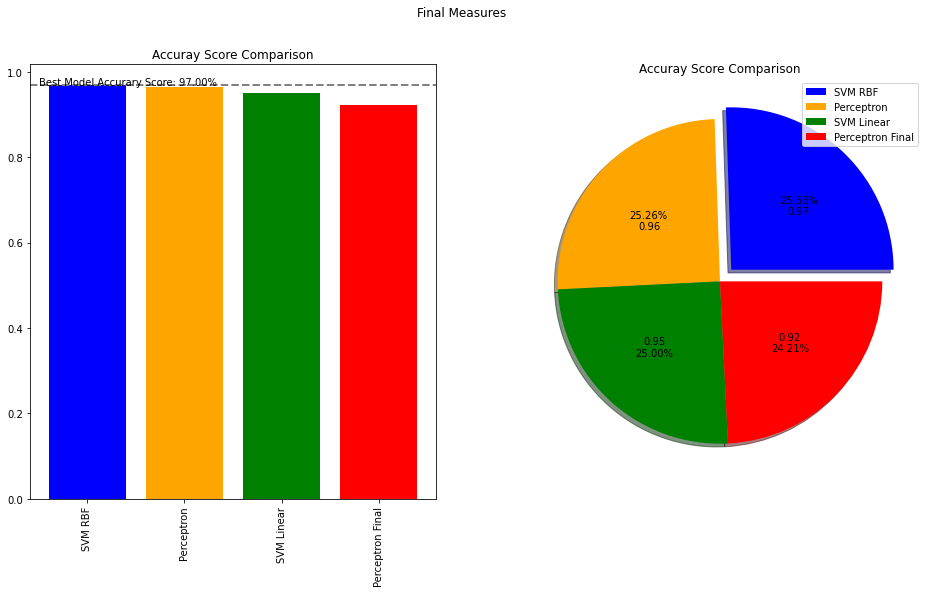

In [44]:
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (16,8))

# Create a bar plot of name vs grade on the first axis
# Index has the Model names, size has the Accuracy Score
ax[0].bar(x=df_task4.index, height=df_task4.max_accuray_Score, color=colors_pattern)
ax[0].set_title('Accuray Score Comparison')
# Move the label names to 90 degres 
ax[0].set_xticklabels(df_task4.index, rotation=90)
# Draw an horizontal line to explicity the Best Model
ax[0].axhline(y=max(df_task4.max_accuray_Score), color = 'gray', linestyle='dashed', linewidth = 2)
# Add an horizontal text on top of the line to the Best Model
ax[0].text(y=max(df_task4.max_accuray_Score), x=-0.5, s=f'Best Model Accurary Score: {np.around(max(df_task4.max_accuray_Score),2):0.2%}')

# Create a pie chart of pass counts on the second axis
# List o Accuracy Score
max_accuracy_score = np.round(df_task4.max_accuray_Score, 2)
# Display a Pie chart exploding the best model accuracy score
ax[1].pie(max_accuracy_score, labels=max_accuracy_score, shadow=True, labeldistance=0.5, autopct='%1.2f%%', explode=(0.1,0,0,0), colors=colors_pattern)
# Chart Label Name
ax[1].set_title('Accuray Score Comparison')
# Set the lengend using the index
ax[1].legend(max_accuracy_score.index)

# Add a title to the Figure
fig.suptitle('Final Measures')

# Show the figure
fig.show()

Final task
Print the time spent to train the best model accuray score for each model

In [147]:
# Create a set o Models based on the models name
list_of_models = set(df_final.Model_Name)
# Loop based on the Model Names to filter the Dataset and get the best score fo each model
for model in list_of_models:
  df_task4_b = df_final.loc[df_final.Model_Name ==model].sort_values(by='Accuray_Score', ascending=False)[{"Model_Name", "Train_Time", "Accuray_Score", "Best_KFold"}].head(1)
  # Print the Dataset values outcomes
  print(f'The best has run at kfold {df_task4_b.Best_KFold.values[0]} for the Model called {df_task4_b.Model_Name.values[0]} and took {np.round(df_task4_b.Train_Time.values[0], 4)} seconds to train the model and got a Score of {np.round(df_task4_b.Accuray_Score.values[0], 4):0.2%} on the prediction test.\n')
  

The best has run at kfold 1 for the Model called Perceptron Final and took 0.5193 seconds to train the model and got a Score of 92.17% on the prediction test.

The best has run at kfold 2 for the Model called SVM Linear and took 3.2018 seconds to train the model and got a Score of 95.00% on the prediction test.

The best has run at kfold 1 for the Model called Perceptron and took 0.2196 seconds to train the model and got a Score of 96.40% on the prediction test.

The best has run at kfold 2 for the Model called SVM RBF and took 2.407 seconds to train the model and got a Score of 97.00% on the prediction test.

